# Data from Top200 SpotifyCharts


Proceso:
 - Sacar top200 de 2017, 2018, 2019 y 2010
 - De canciones duplicadas sumar los Streams y unir, quitar duplicados
 - Juntar Dataframes de años y añadir una nueva columna con el mismo.


## Preparación

In [134]:
# Ayuda de código: https://github.com/kelvingakuo/fycharts#in
#INSTALAR:
#! pip install fycharts

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Region seleccionada:
region_select = ["es"]

# Seleciono periodos completos que me interesan para como de datos principal, más adelante selecciono los periodos concretos.

# Año 2017
fecha_inicial_2017= datetime.datetime(2017, 1, 1)
fecha_fin_2017 = datetime.datetime(2017, 5, 20)
out_file_db_2017 = "sqlite:///top_200_daily_{}.db".format(fecha_inicial_2017.year)
out_file_csv_2017 = "top_200_daily_CSV_{}.csv".format(fecha_inicial_2017.year)

# Año 2018
fecha_inicial_2018= datetime.datetime(2018, 1, 1)
fecha_fin_2018 = datetime.datetime(2018, 5, 20)
out_file_db_2018 = "sqlite:///top_200_daily_{}.db".format(fecha_inicial_2018.year)
out_file_csv_2018 = "top_200_daily_CSV_{}.csv".format(fecha_inicial_2018.year)

# Año 2019
fecha_inicial_2019= datetime.datetime(2019, 1, 1)
fecha_fin_2019 = datetime.datetime(2019, 5, 20)
out_file_db_2019 = "sqlite:///top_200_daily_{}.db".format(fecha_inicial_2019.year)
out_file_csv_2019 = "top_200_daily_CSV_{}.csv".format(fecha_inicial_2019.year)

#Año 2020
fecha_inicial_2020= datetime.datetime(2020, 1, 1)
fecha_fin_2020 = datetime.datetime(2020, 5, 19)
out_file_db_2020 = "sqlite:///top_200_daily_{}.db".format(fecha_inicial_2020.year)
out_file_csv_2020 = "top_200_daily_CSV_{}.csv".format(fecha_inicial_2020.year)

'''# Año 2020
fecha_inicial_2020 = '2020-01-01'
fecha_fin_2020 = '2020-05-20'
fecha_fin2_2020 = datetime.strptime(fecha_fin_2020, '%Y-%m-%d')
fecha_inicial2_2020 = datetime.strptime(fecha_inicial_2020, '%Y-%m-%d')
out_file_db_2020 = "sqlite:///top_200_daily_{}.db".format(fecha_inicial_2020 + '_to_' + fecha_fin_2020)
out_file_csv_2020 = "top_200_daily_CSV_{}.csv".format(fecha_inicial_2020 + '_to_' + fecha_fin_2020)'''

print('Días totales seleccionados 2020:', fecha_fin_2020 - fecha_inicial_2020)
print('Días totales seleccionados 2019:', fecha_fin_2019 - fecha_inicial_2019)
print('Días totales seleccionados 2018:', fecha_fin_2018 - fecha_inicial_2018)
print('Días totales seleccionados 2017:', fecha_fin_2017 - fecha_inicial_2017)

Días totales seleccionados 2020: 139 days, 0:00:00
Días totales seleccionados 2019: 139 days, 0:00:00
Días totales seleccionados 2018: 139 days, 0:00:00
Días totales seleccionados 2017: 139 days, 0:00:00


In [136]:
# Definición para extracción de canciones

def extraction_tracks(fecha_inicial, fecha_final, region_select, out_file_db, out_file_csv):
    from fycharts.SpotifyCharts import SpotifyCharts
    import sqlalchemy
    
    api = SpotifyCharts()
    connector = sqlalchemy.create_engine(out_file_db, echo=False)
    api.top200Daily(output_file = out_file_csv, output_db = connector, webhook = "https://mywebhookssite.com/post/", 
                start = fecha_inicial, end = fecha_final, region = region_select)

In [104]:
'''# Extracción de canciones
# SOLO EJECUTAR UNA VEZ INICIAL

Time1 = datetime.now()

extraction_tracks(fecha_inicial_2017, fecha_fin_2017, region_select, out_file_db_2017, out_file_csv_2017)
extraction_tracks(fecha_inicial_2018, fecha_fin_2018, region_select, out_file_db_2018, out_file_csv_2018)
extraction_tracks(fecha_inicial_2019, fecha_fin_2019, region_select, out_file_db_2019, out_file_csv_2019)
extraction_tracks(fecha_inicial_2020, fecha_fin_2020, region_select, out_file_db_2020, out_file_csv_2020)

Time2 = datetime.now()

print("Tiempo ejecución:", Time2 -Time1)'''

INFO : 21/08/2020 03:13:14 PM : Extracting top 200 daily for 2017-01-01 - es
INFO : 21/08/2020 03:13:15 PM : Extracting top 200 daily for 2017-01-02 - es
INFO : 21/08/2020 03:13:15 PM : Appending data to the table top_200_daily
INFO : 21/08/2020 03:13:15 PM : POSTing data to the endpoint h
INFO : 21/08/2020 03:13:15 PM : Appending data to the file top_200_daily_CSV_2017-01-01_to_2017-05-20.csv...
Exception in thread Thread-60:
Traceback (most recent call last):
  File "/Users/victormac/opt/anaconda3/lib/python3.8/site-packages/fycharts/SpotifyCharts.py", line 87, in __post_to_endpoint_from_queue
    INFO : 21/08/2020 03:13:15 PM : Done appending to the file top_200_daily_CSV_2017-01-01_to_2017-05-20.csv!!!
postToRestEndpoint(df, url, what_data)
  File "/Users/victormac/opt/anaconda3/lib/python3.8/site-packages/fycharts/write_to_outputs.py", line 54, in postToRestEndpoint
    raise(e)
  File "/Users/victormac/opt/anaconda3/lib/python3.8/site-packages/fycharts/write_to_outputs.py", line 

KeyboardInterrupt: 

In [112]:
fecha_inicial[:4]

'2020'

## Importar la tabla

In [137]:
# Importamos la tabla con los datos y miramos a ver qué tal están
data_top200_2017= pd.read_csv("top_200_daily_CSV_2017.csv")
data_top200_2018= pd.read_csv("top_200_daily_CSV_2018.csv")
data_top200_2019= pd.read_csv("top_200_daily_CSV_2019.csv")
data_top200_2020= pd.read_csv("top_200_daily_CSV_2020.csv")

# Revisar
print(data_top200_2020.isnull().sum())
print('2020:', data_top200_2020.shape)
print('2019:',data_top200_2019.shape)
print('2018:',data_top200_2018.shape)
print('2017:',data_top200_2017.shape)
data_top200_2017.head()

Position      0
Track Name    0
Artist        0
Streams       0
date          0
region        0
spotify_id    0
dtype: int64
2020: (28200, 7)
2019: (28000, 7)
2018: (28000, 7)
2017: (28000, 7)


,Position,Track Name,Artist,Streams,date,region,spotify_id
0,1,Chantaje (feat. Maluma),Shakira,189721,2017-01-01,es,6mICuAdrwEjh6Y6lroV2Kg
1,2,Reggaetón Lento (Bailemos),CNCO,165291,2017-01-01,es,3AEZUABDXNtecAOSC1qTfo
2,3,Safari,J Balvin,141575,2017-01-01,es,6rQSrBHf7HlZjtcMZ4S4bO
3,4,Vente Pa' Ca (feat. Maluma),Ricky Martin,119865,2017-01-01,es,7DM4BPaS7uofFul3ywMe46
4,5,La Bicicleta,Carlos Vives,119181,2017-01-01,es,0sXvAOmXgjR2QUqLK1MltU


In [141]:
# Importamos con las columnas que nos interesan
data_top200_2020 = pd.read_csv("top_200_daily_CSV_2020.csv", parse_dates= ["date"],
                               usecols=['Position','Track Name', 'Artist', 'date', 'Streams', 'date', 'spotify_id'])
data_top200_2019 = pd.read_csv("top_200_daily_CSV_2019.csv", parse_dates= ["date"],
                               usecols=['Position','Track Name', 'Artist', 'date', 'Streams', 'date', 'spotify_id'])
data_top200_2018 = pd.read_csv("top_200_daily_CSV_2018.csv", parse_dates= ["date"],
                               usecols=['Position','Track Name', 'Artist', 'date', 'Streams', 'date', 'spotify_id'])
data_top200_2017 = pd.read_csv("top_200_daily_CSV_2017.csv", parse_dates= ["date"],
                               usecols=['Position','Track Name', 'Artist', 'date', 'Streams', 'date', 'spotify_id'])

#Meto el año en nueva columnas columnas
data_top200_2020['year'] = pd.DatetimeIndex(data_top200_2020['date']).year
data_top200_2019['year'] = pd.DatetimeIndex(data_top200_2019['date']).year
data_top200_2018['year'] = pd.DatetimeIndex(data_top200_2018['date']).year
data_top200_2017['year'] = pd.DatetimeIndex(data_top200_2017['date']).year

# Dividir por periodos de estudio para posteriormente hacer un contraste entre periodos para ver si siguen la misma tendencia
# PERIODO PANDEMIA: (2020, 3, 13) - (2020, 5, 12)
# PERIODO NORMAL PREVIO: (2020, 1, 8) - (2020, 3, 8)
# SELECCIONAMOS 60 DÍAS EXACTOS EN CADA PERIODO

# 2020
fecha_inicial_2020_coronaperiod = datetime.datetime(2020, 3, 13)
fecha_final_2020_coronaperiod = datetime.datetime(2020, 5, 12)
fecha_inicial_2020_normalperiod = datetime.datetime(2020, 1, 8)
fecha_final_2020_normalperiod = datetime.datetime(2020, 3, 8)
print('Días totales seleccionados 2020:', fecha_final_2020_coronaperiod - fecha_inicial_2020_coronaperiod)
print('Días totales seleccionados 2020:', fecha_final_2020_normalperiod - fecha_inicial_2020_normalperiod)
data_top200_2020_coronaperiod = data_top200_2020[data_top200_2020.date.between(fecha_inicial_2020_coronaperiod, fecha_final_2020_coronaperiod)]
data_top200_2020_normalperiod = data_top200_2020[data_top200_2020.date.between(fecha_inicial_2020_normalperiod, fecha_final_2020_normalperiod)]

#2019
fecha_inicial_2019_coronaperiod = datetime.datetime(2019, 3, 13)
fecha_final_2019_coronaperiod = datetime.datetime(2019, 5, 12)
fecha_inicial_2019_normalperiod = datetime.datetime(2019, 1, 8)
fecha_final_2019_normalperiod = datetime.datetime(2019, 3, 9)
print('Días totales seleccionados 2019:', fecha_final_2019_coronaperiod - fecha_inicial_2019_coronaperiod)
print('Días totales seleccionados 2019:', fecha_final_2019_normalperiod - fecha_inicial_2019_normalperiod)
data_top200_2019_coronaperiod = data_top200_2019[data_top200_2019.date.between(fecha_inicial_2019_coronaperiod, fecha_final_2019_coronaperiod)]
data_top200_2019_normalperiod = data_top200_2019[data_top200_2019.date.between(fecha_inicial_2019_normalperiod, fecha_final_2019_normalperiod)]

# 2018
fecha_inicial_2018_coronaperiod = datetime.datetime(2018, 3, 13)
fecha_final_2018_coronaperiod = datetime.datetime(2018, 5, 12)
fecha_inicial_2018_normalperiod = datetime.datetime(2018, 1, 8)
fecha_final_2018_normalperiod = datetime.datetime(2018, 3, 9)
print('Días totales seleccionados 2018:', fecha_final_2018_coronaperiod - fecha_inicial_2018_coronaperiod)
print('Días totales seleccionados 2018:', fecha_final_2018_normalperiod - fecha_inicial_2018_normalperiod)
data_top200_2018_coronaperiod = data_top200_2018[data_top200_2018.date.between(fecha_inicial_2018_coronaperiod, fecha_final_2018_coronaperiod)]
data_top200_2018_normalperiod = data_top200_2018[data_top200_2018.date.between(fecha_inicial_2018_normalperiod, fecha_final_2018_normalperiod)]

# 2017
fecha_inicial_2017_coronaperiod = datetime.datetime(2017, 3, 13)
fecha_final_2017_coronaperiod = datetime.datetime(2017, 5, 12)
fecha_inicial_2017_normalperiod = datetime.datetime(2017, 1, 8)
fecha_final_2017_normalperiod = datetime.datetime(2017, 3, 9)
print('Días totales seleccionados 2017:', fecha_final_2017_coronaperiod - fecha_inicial_2017_coronaperiod)
print('Días totales seleccionados 2017:', fecha_final_2017_normalperiod - fecha_inicial_2017_normalperiod)
data_top200_2017_coronaperiod = data_top200_2017[data_top200_2017.date.between(fecha_inicial_2017_coronaperiod, fecha_final_2017_coronaperiod)]
data_top200_2017_normalperiod = data_top200_2017[data_top200_2017.date.between(fecha_inicial_2017_normalperiod, fecha_final_2017_normalperiod)]

#Concateno los datos de todos los años
# data_top200 = pd.concat([data_top200_2020, data_top200_2019, data_top200_2018, data_top200_2017], axis=0,)
data_top200_coronaperiod = pd.concat([data_top200_2020_coronaperiod, data_top200_2019_coronaperiod,
                                      data_top200_2018_coronaperiod, data_top200_2017_coronaperiod], axis=0,)
data_top200_normalperiod = pd.concat([data_top200_2020_normalperiod, data_top200_2019_normalperiod,
                                      data_top200_2018_normalperiod, data_top200_2017_normalperiod], axis=0,)

Días totales seleccionados 2020: 60 days, 0:00:00
Días totales seleccionados 2020: 60 days, 0:00:00
Días totales seleccionados 2019: 60 days, 0:00:00
Días totales seleccionados 2019: 60 days, 0:00:00
Días totales seleccionados 2018: 60 days, 0:00:00
Días totales seleccionados 2018: 60 days, 0:00:00
Días totales seleccionados 2017: 60 days, 0:00:00
Días totales seleccionados 2017: 60 days, 0:00:00


In [142]:
# Revisar 1
print(data_top200_coronaperiod.dtypes)
print(data_top200_coronaperiod.nunique()) # Ojo, debería haber el mismo número de Track Names y spotify ID!!
print(data_top200_coronaperiod.shape)
print(data_top200_coronaperiod.groupby(['year']).sum())
print(data_top200_coronaperiod.groupby(['year']).count())

# Revisar 2
print(data_top200_normalperiod.dtypes)
print(data_top200_normalperiod.nunique()) # Ojo, debería haber el mismo número de Track Names y spotify ID!!
print(data_top200_normalperiod.shape)
print(data_top200_normalperiod.groupby(['year']).sum())
print(data_top200_normalperiod.groupby(['year']).count())

Position               int64
Track Name            object
Artist                object
Streams                int64
date          datetime64[ns]
spotify_id            object
year                   int64
dtype: object
Position        200
Track Name     1453
Artist          468
Streams       37704
date            244
spotify_id     1617
year              4
dtype: int64
(48800, 7)
      Position    Streams
year                     
2017   1226100  595957911
2018   1226100  699945633
2019   1226100  921683011
2020   1226100  989830710
      Position  Track Name  Artist  Streams   date  spotify_id
year                                                          
2017     12200       12200   12200    12200  12200       12200
2018     12200       12200   12200    12200  12200       12200
2019     12200       12200   12200    12200  12200       12200
2020     12200       12200   12200    12200  12200       12200
Position               int64
Track Name            object
Artist                objec

In [145]:
data_top200_coronaperiod.loc[data_top200_coronaperiod['spotify_id'] == '6NfrH0ANGmgBXyxgV2PeXt']

,Position,Track Name,Artist,Streams,date,spotify_id,year
14401,2,La Difícil,Bad Bunny,406642,2020-03-13,6NfrH0ANGmgBXyxgV2PeXt,2020
14601,2,La Difícil,Bad Bunny,399788,2020-03-14,6NfrH0ANGmgBXyxgV2PeXt,2020
14801,2,La Difícil,Bad Bunny,372705,2020-03-15,6NfrH0ANGmgBXyxgV2PeXt,2020
15001,2,La Difícil,Bad Bunny,389384,2020-03-16,6NfrH0ANGmgBXyxgV2PeXt,2020
15201,2,La Difícil,Bad Bunny,390067,2020-03-17,6NfrH0ANGmgBXyxgV2PeXt,2020
...,...,...,...,...,...,...,...
25617,18,La Difícil,Bad Bunny,172109,2020-05-08,6NfrH0ANGmgBXyxgV2PeXt,2020
25817,18,La Difícil,Bad Bunny,165292,2020-05-09,6NfrH0ANGmgBXyxgV2PeXt,2020
26026,27,La Difícil,Bad Bunny,151313,2020-05-10,6NfrH0ANGmgBXyxgV2PeXt,2020
26228,29,La Difícil,Bad Bunny,166240,2020-05-11,6NfrH0ANGmgBXyxgV2PeXt,2020


In [146]:
# Agrupar sumas y convertir en Dataframe
data_top200_sumastreams = data_top200_coronaperiod.groupby('spotify_id')['Streams'].sum()
data_top200_sumastreams = pd.DataFrame({'spotify_id':data_top200_sumastreams.index, 'Streams':data_top200_sumastreams.values})
print(data_top200_sumastreams.shape)
data_top200_sumastreams.head()


#Después de muchos intentos, encontré una forma superfácil de hacerlo
data_top200_merged = pd.merge(data_top200_coronaperiod, data_top200_sumastreams, on=['spotify_id'], how='inner')

data_top200_merged.rename(columns = {'Streams_x':'Streams', 'Streams_y':'Streamstotal'},  inplace = True)
print(data_top200_merged.shape)
data_top200_merged

# Comprobaciones
# data_top200_sumastreams[data_top200_sumastreams['spotify_id'] == '7k4t7uLgtOxPwTpFmtJNTY']
# data_top200[data_top200['spotify_id'] == '7k4t7uLgtOxPwTpFmtJNTY']

(1617, 2)


,spotify_id,Streams
0,000xQL6tZNLJzIrtIgxqSl,1209136
1,00ZBADBKZGwnzGIAA6U9Fb,44107
2,00lNx0OcTJrS3MKHcB80HY,3404338
3,017PF4Q3l4DBUiWoXk4OWT,2768252
4,01k24g94i1JvkFLQmVEdCd,24517


Tengo 24400 filas en canciones, de las cuales hay 738 canciones únicas (Dataframe 1, si hago un groupby para que me sume los Streams de las mismas canciones se hace sin problema y tengo un Dataframe 2

Pero ahora no quiero perder las demás columnas haciendo groupby, pero es la forma fácil de hacer las sumas de Streams. Pero entonces quisiera añadir en nueva columna en el dataframe 1 el dato de Streams totales de dicha canción. Lo ideal sería hacer un bucle que mirara si el Track name es el mismo, entonces en una nueva columna añadiría ese dato para esa fila.

SOLUCIONADO CON UN MERGE!!!

In [171]:
#Después de muchos intentos, encontré una forma superfácil de hacerlo
data_top200_merged_coronaperiod = pd.merge(data_top200_coronaperiod, data_top200_sumastreams, on=['spotify_id'], how='inner')

data_top200_merged_coronaperiod.rename(columns = {'Streams_x':'Streams', 'Streams_y':'Streamstotal'},  inplace = True)
print(data_top200_coronaperiod.shape)
data_top200_coronaperiod

# Comprobaciones
# data_top200_sumastreams[data_top200_sumastreams['spotify_id'] == '7k4t7uLgtOxPwTpFmtJNTY']
# data_top200[data_top200['spotify_id'] == '7k4t7uLgtOxPwTpFmtJNTY']

(48800, 7)


,Position,Track Name,Artist,Streams,date,spotify_id,year
14400,1,Tusa,KAROL G,432730,2020-03-13,7k4t7uLgtOxPwTpFmtJNTY,2020
14401,2,La Difícil,Bad Bunny,406642,2020-03-13,6NfrH0ANGmgBXyxgV2PeXt,2020
14402,3,Tattoo,Rauw Alejandro,378009,2020-03-13,7na7Bk98usp84FaOJFPv3d,2020
14403,4,Diosa,Myke Towers,333403,2020-03-13,3JHpk0DOTOzyh0777JFAky,2020
14404,5,Rojo,J Balvin,333117,2020-03-13,4uziEsK1yiqdauKVDPsmVG,2020
...,...,...,...,...,...,...,...
26395,196,September Song,JP Cooper,18202,2017-05-12,0FuTx2s3YH1ppmtiM6l0zI,2017
26396,197,Cuánto Me Duele,Morat,17757,2017-05-12,1PVjdldNeaJxETpW0jpJQo,2017
26397,198,This Girl (Kungs Vs. Cookin' On 3 Burners),Kungs,17743,2017-05-12,0tICYNayWWhH9GPeFrfjfD,2017
26398,199,Todo Cambio REMIX (feat. Justin Quiles),Becky G,17743,2017-05-12,1utxWJAmA0NC9rN5JEBUu8,2017


In [172]:
#Sacar lista de CANCIONES TOTALES (con repetición) para luego sacar las Features
list_ids = data_top200_merged_coronaperiod['spotify_id'].tolist()
print('id de ejemplo', list_ids[0])
print('Canciones totales:', len(list_ids))

# Quitar duplicados, QUEDARNOS CON CANCIONES ÚNICAS
list_ids = list(set(list_ids))
print('Canciones totales únicas:' ,len(list_ids))

# Cojo un muestra de test más pequeña al princpio y luego la pongo por encima del total
test_list = list_ids[0:3000]
len(test_list)


id de ejemplo 7k4t7uLgtOxPwTpFmtJNTY
Canciones totales: 48800
Canciones totales únicas: 1617


1617

In [173]:
#Sacar lista de ARTISTAS TOTALES
list_artist = data_top200_merged_coronaperiod['Artist'].tolist()
print('nombre de ejemplo:', list_artist[0])
print('Artistas totales:', len(list_artist))

# Quitar duplicados, QUEDARNOS CON ARTISTAS ÚNICOS
list_artist = list(set(list_artist))
print('Artistas totales únicos:' ,len(list_artist))

# Cojo un muestra de test más pequeña al princpio y luego la pongo por encima del total
test_list_artist = list_artist[0:1000]
len(test_list_artist)



nombre de ejemplo: KAROL G
Artistas totales: 48800
Artistas totales únicos: 468


468

# Data from API SPOTIFY



Proceso:

- Investigar cómo sacar features en serie con ID de canciones con API de Spotify
- Descargar features de las listas de top200
- Juntar Dataframes de features con el de top200 

In [12]:
# Instalaciones previas
# !pip install spotipy

In [154]:
#Preparación de Spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time 

'''COLLAB:
passw = pd.read_csv("/content/drive/My Drive/REPOS-Github/spotify-musicanalysis-coronavirus/pass_spotify.txt", sep = ',', encoding="utf-8")'''
passw = pd.read_csv("pass_spotify.txt", sep = ',', encoding="utf-8")
client_id = passw.columns[0]
client_secret = passw.columns[1]

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [155]:
'''#Ver las features que hay de Artists
track_ids = sp.user_playlist_tracks(playlist_id='1ebwiiN18Gmhfj6e24pT3X', fields='items(track(id))')
sp.audio_features(track_ids['items'][5]['track']['id'])
'''

#Ver las features que hay de Tracks, para probar
track_ids = sp.user_playlist_tracks(playlist_id='1ebwiiN18Gmhfj6e24pT3X', fields='items(track(id))')
sp.audio_features(track_ids['items'][5]['track']['id'])

[{'danceability': 0.669,
  'energy': 0.829,
  'key': 1,
  'loudness': -3.801,
  'mode': 1,
  'speechiness': 0.49,
  'acousticness': 0.179,
  'instrumentalness': 0,
  'liveness': 0.241,
  'valence': 0.61,
  'tempo': 118.934,
  'type': 'audio_features',
  'id': '2eOuL8KesslTLQERQPu11D',
  'uri': 'spotify:track:2eOuL8KesslTLQERQPu11D',
  'track_href': 'https://api.spotify.com/v1/tracks/2eOuL8KesslTLQERQPu11D',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2eOuL8KesslTLQERQPu11D',
  'duration_ms': 253067,
  'time_signature': 4}]

In [156]:
# Función para sacar las features de canciones que me interesan desde la id
def getTrackFeatures(id):
  meta = sp.track(id)
  features = sp.audio_features(id)

  # meta
  name = meta['name']
  album = meta['album']['name']
  artist = meta['album']['artists'][0]['name']
  release_date = meta['album']['release_date']
  length = meta['duration_ms']
  popularity = meta['popularity']

  # features
  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  liveness = features[0]['liveness']
  loudness = features[0]['loudness']
  speechiness = features[0]['speechiness']
  valence = features[0]['valence']
  tempo = features[0]['tempo']
  time_signature = features[0]['time_signature']
  id = features[0]['id']

  track = [name, album, artist, release_date, length, popularity,
           acousticness, danceability, energy, instrumentalness,
           liveness, loudness, speechiness, valence, tempo, time_signature, id]
  return track

In [16]:
'''# Loop para sacar features de todas las canciones de una lista
# OJO, tarda bastante dependendo del número de canciones, por lo que antes hago un testeo
import time
list_toextract = test_list

tracks = []

Time1 = datetime.now()


for i in range(len(list_toextract)):
    time.sleep(.5)
    track = getTrackFeatures(list_toextract[i])
    tracks.append(track)
    
Time2 = datetime.now()


Time1_v = datetime.now()

for i in range(len(list_toextract)):
    # time.sleep(.5)
    track = getTrackFeatures(list_toextract[i])
    tracks.append(track)
    
Time2_v = datetime.now()

print("Tiempo 1:", Time2 -Time1)
print("Tiempo 2:", Time2_v -Time1_v)
'''

'# Loop para sacar features de todas las canciones de una lista\n# OJO, tarda bastante dependendo del número de canciones, por lo que antes hago un testeo\nimport time\nlist_toextract = test_list\n\ntracks = []\n\nTime1 = datetime.now()\n\n\nfor i in range(len(list_toextract)):\n    time.sleep(.5)\n    track = getTrackFeatures(list_toextract[i])\n    tracks.append(track)\n    \nTime2 = datetime.now()\n\n\nTime1_v = datetime.now()\n\nfor i in range(len(list_toextract)):\n    # time.sleep(.5)\n    track = getTrackFeatures(list_toextract[i])\n    tracks.append(track)\n    \nTime2_v = datetime.now()\n\nprint("Tiempo 1:", Time2 -Time1)\nprint("Tiempo 2:", Time2_v -Time1_v)\n'

In [160]:
# Ejecuto el script para sacar las features de las canciones (tarda bastante el proceso, dependiendo del número de canciones seleccionadas)
list_toextract = test_list

tracks = []

Time1 = datetime.datetime.now()
for i in range(len(list_toextract)):
    track = getTrackFeatures(list_toextract[i])
    tracks.append(track)
Time2 = datetime.datetime.now()

print("Tiempo ejecución:", Time2 -Time1)


Tiempo ejecución: 0:05:15.604419


In [161]:
# Meterlo en Dataframe
data_features = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date',
                                             'length', 'popularity','acousticness', 'danceability', 'energy',
                                             'instrumentalness', 'liveness', 'loudness',
                                             'speechiness', 'valence','tempo', 'time_signature', 'id'])

data_features_final = data_features [['album','release_date','length', 'popularity',
                                             'acousticness', 'danceability', 'energy',
                                             'instrumentalness', 'liveness', 'loudness',
                                             'speechiness', 'valence','tempo', 'time_signature', 'id']]

data_features_final = data_features_final.rename(columns = {'id':'spotify_id'})


In [162]:
data_features_final.shape

(1617, 15)

In [163]:
print(data_features_final.shape)
data_features_final.head(2)

(1617, 15)


,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,spotify_id
0,Poca Suerte,2018-11-14,238461,57,0.3560,0.737,0.513,0.00000,0.177,-6.978,0.0519,0.271,156.050,4,5NuVQ1a9vJxMeXJNMpXfZ7
1,Stories,2015-10-02,232760,1,0.0487,0.634,0.674,0.00116,0.102,-7.145,0.0465,0.298,115.995,4,2BVVmJQZv4fOPWavI9mkIj


# ¿Es necesario normalizar algunas features?

- Revisar las features y su distribución

In [164]:
# Hacemos un describe y se ve la desviación estandar dispar en algunas features
data_features_final.describe()


,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature
count,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.00000,1617.000000,1617.000000
mean,211263.348794,51.428571,0.241084,0.698804,0.678709,0.008477,0.164979,-5.698759,0.109506,0.56974,121.989968,3.980829
std,39569.469178,29.280628,0.228522,0.123324,0.158542,0.060024,0.118671,2.437374,0.092490,0.21921,31.933732,0.202713
min,74231.000000,0.000000,0.000016,0.153000,0.043400,0.000000,0.021500,-31.042000,0.023200,0.04990,62.446000,1.000000
25%,188080.000000,39.000000,0.060300,0.627000,0.587000,0.000000,0.092700,-6.688000,0.047300,0.40800,95.973000,4.000000
50%,208210.000000,62.000000,0.167000,0.719000,0.708000,0.000000,0.120000,-5.316000,0.072500,0.58600,113.012000,4.000000
75%,229455.000000,73.000000,0.352000,0.787000,0.794000,0.000023,0.197000,-4.166000,0.137000,0.74800,143.965000,4.000000
max,464200.000000,100.000000,0.984000,0.968000,0.989000,0.915000,0.838000,-0.582000,0.714000,0.97300,212.117000,5.000000


''

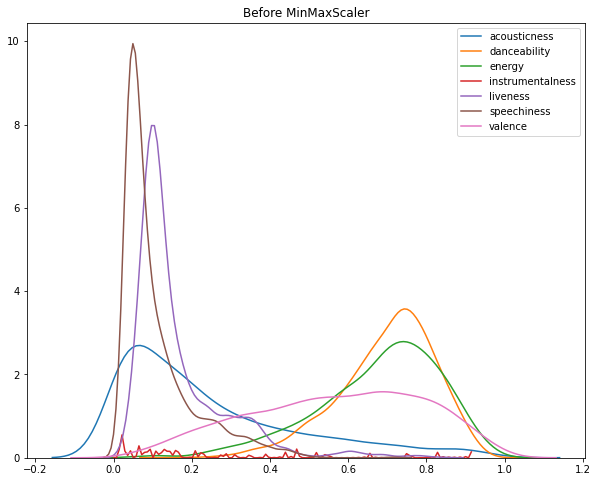

In [165]:
# Parece que length, popularity, loudness y tempo habría que normalizar entre 0 y 1, como el resto.
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Before MinMaxScaler')

# sns.kdeplot(data_final_selected['length'], ax=ax1)
# sns.kdeplot(data_final_selected['popularity'], ax=ax1)
sns.kdeplot(data_features_final['acousticness'], ax=ax1)
sns.kdeplot(data_features_final['danceability'], ax=ax1)
sns.kdeplot(data_features_final['energy'], ax=ax1)
sns.kdeplot(data_features_final['instrumentalness'], ax=ax1)
sns.kdeplot(data_features_final['liveness'], ax=ax1)
# sns.kdeplot(data_final_selected['loudness'], ax=ax1)
sns.kdeplot(data_features_final['speechiness'], ax=ax1)
sns.kdeplot(data_features_final['valence'], ax=ax1)
# sns.kdeplot(data_final_selected['tempo'], ax=ax1)
;

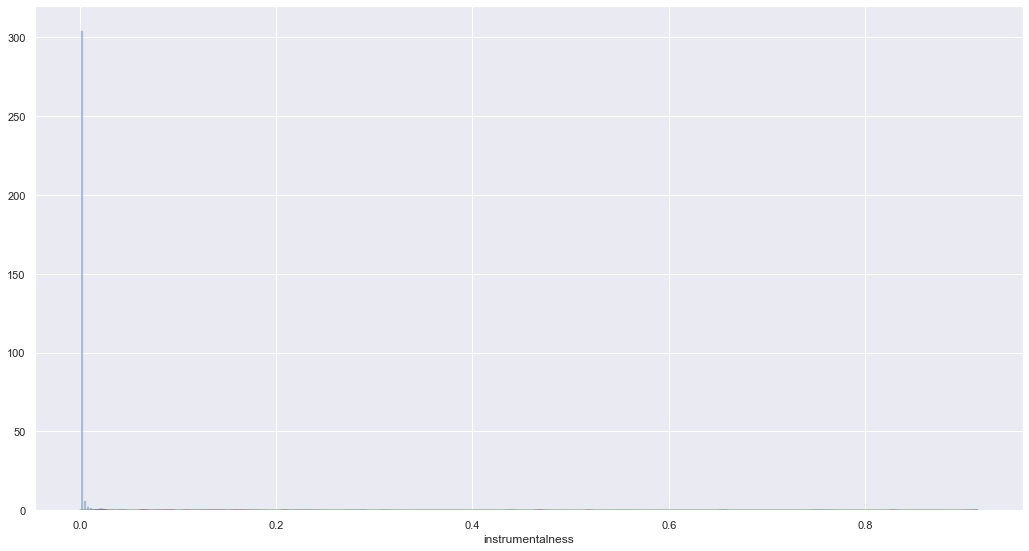

album               8
release_date        8
length              8
popularity          8
acousticness        8
danceability        8
energy              8
instrumentalness    8
liveness            8
loudness            8
speechiness         8
valence             8
tempo               8
time_signature      8
spotify_id          8
dtype: int64
album               911
release_date        911
length              911
popularity          911
acousticness        911
danceability        911
energy              911
instrumentalness    911
liveness            911
loudness            911
speechiness         911
valence             911
tempo               911
time_signature      911
spotify_id          911
dtype: int64


In [166]:
# Reviso la feature instrumentalness, que es un poco rara

sns.set(rc={'figure.figsize':(17.7,9.27)})
sns.distplot(data_features_final['instrumentalness'], bins=300)
plt.show()

# Está bien, pero casi todos los valores están muy muy próximos a 0, siendo más de la mitad 0, así que lo dejamos así.
print(data_features_final[data_features_final['instrumentalness'] > 0.5].count())
print(data_features_final[data_features_final['instrumentalness'] == 0].count())

# Spotify define este feature como que si el valor está entre 0.5 y 1 es instrumental, por tanto, VALORAR si tranformar en variable dicotómica.


In [167]:
'''# Vamos a ver la distribución de todas las features (tarda en cargar)
sns.pairplot(data_features_final);'''

'# Vamos a ver la distribución de todas las features (tarda en cargar)\nsns.pairplot(data_features_final);'

''

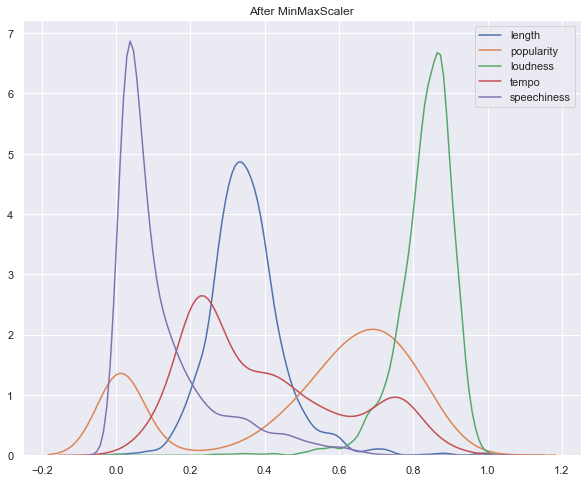

In [168]:
# Finalmente decido normalizar con máximos y mínimos dichas features

# Definir tabla con features seleccionadas y ver cómo quedan
features = data_features_final[['length', 'popularity','loudness','tempo','speechiness']]

import seaborn as sns
from sklearn import preprocessing
# Cogemos la lista de features
col_names = list(features.columns)

maxmin_scaler = preprocessing.MinMaxScaler()
features_maxmin = maxmin_scaler.fit_transform(features)

features_maxmin_final = pd.DataFrame(features_maxmin, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After MinMaxScaler')

sns.kdeplot(features_maxmin_final['length'], ax=ax1)
sns.kdeplot(features_maxmin_final['popularity'], ax=ax1)
sns.kdeplot(features_maxmin_final['loudness'], ax=ax1)
sns.kdeplot(features_maxmin_final['tempo'], ax=ax1)
sns.kdeplot(features_maxmin_final['speechiness'], ax=ax1)

'''sns.kdeplot(features['danceability'], ax=ax1)
sns.kdeplot(features['valence'], ax=ax1)'''
;

In [169]:
# Para modificar sobre dataframe sólo determinadas columnas se puede hacer de otra forma:
features_to_normalize = ['length', 'popularity', 'loudness', 'tempo', 'speechiness']

data_features_final[features_to_normalize] = data_features_final[features_to_normalize].apply(lambda x:(x-x.min()) / (x.max()-x.min()))
data_features_final.head(2)

,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,spotify_id
0,Poca Suerte,2018-11-14,0.421136,0.57,0.3560,0.737,0.513,0.00000,0.177,0.790020,0.041546,0.271,0.625398,4,5NuVQ1a9vJxMeXJNMpXfZ7
1,Stories,2015-10-02,0.406517,0.01,0.0487,0.634,0.674,0.00116,0.102,0.784537,0.033729,0.298,0.357778,4,2BVVmJQZv4fOPWavI9mkIj


# Unir Dataframes en uno

In [186]:
data_features_coronaperiod = pd.merge(data_top200_merged_coronaperiod, data_features_final, on=['spotify_id'], how='inner')
print(data_features.shape)


###### Exportar a CSV
data_features_coronaperiod.to_csv("data_features.csv", sep = ',')



(48800, 22)


In [187]:
print(data_features_coronaperiod.shape)
data_features_coronaperiod.sample(3)

(48800, 22)


,Position,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,...,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature
2580,91,A Tu Merced,Bad Bunny,59864,2020-05-10,4r9jkMEnArtWGH2rL2FZl0,2020,3573138,YHLQMDLG,2020-02-28,...,0.1690,0.860,0.791,0.000106,0.106,0.862049,0.048639,0.887,0.197613,4
20999,162,Salvajes irracionales,Efecto Pasillo,34096,2019-04-01,1Ft3KKDbvXduw91Y9DZ2AB,2019,3091076,Barrio Las Banderas,2017-09-08,...,0.0233,0.737,0.829,0.000000,0.347,0.864215,0.076867,0.728,0.251071,4
45980,187,París,Dani Martín,17672,2017-03-22,7A6vqBPkt4rbwXsKhrl7B1,2017,275394,La Montaña Rusa,2016-09-23,...,0.0536,0.562,0.724,0.000031,0.102,0.809521,0.003764,0.307,0.210909,4


In [188]:
# ¿Cuántos artistas únicos hay realmente?
artist_unique = data_features_coronaperiod.groupby('Artist')['spotify_id'].nunique()
print(artist_unique.shape)
artist_unique.sort_values(ascending=False).head(20)

(468,)


Artist
Bad Bunny          44
J Balvin           31
Ozuna              28
C. Tangana         25
Ed Sheeran         22
Dua Lipa           21
Beret              20
Aitana             20
The Weeknd         20
Drake              19
Billie Eilish      19
Leiva              19
Sebastian Yatra    19
Avicii             17
Rels B             17
Morat              16
Maluma             15
KAROL G            14
Dalex              13
Alejandro Sanz     13
Name: spotify_id, dtype: int64

# Extracción del género canciones

Proceso:
 - Investigar sobre donde sacar la info de géneros
 - Encontrar dataset con género de canciones
 - Crear varios algoritmos de clasificación y probar (random forest? SVM?)
 - Clasificar todas las canciones y añadir columna al dataset final.



Podría hacer un algoritmo de clasificación por géneros pero se descarta porque su accuracy es muy bajo según he visto en otros análisis.

Most listened genres: Pop, Rock, Oldies, Hip-hop/Rap, Dance/Electronic, Indie/Alternative, K-Pop, Metal, R&B, Classical
https://celebrityaccess.com/2019/10/05/pop-is-still-the-1-music-genre-worldwide/


Most popular genres:
1	☊	pop
2	☊	dance pop
3	☊	rap
4	☊	pop rap
5	☊	rock
6	☊	post-teen pop
7	☊	latin
8	☊	hip hop
9	☊	trap
10	☊	edm
11	☊	modern rock
12	☊	tropical house
13	☊	pop rock
14	☊	melodic rap
15	☊	reggaeton
16	☊	latin pop
17	☊	classic rock
18	☊	electropop
19	☊	mellow gold
20	☊	album rock
http://everynoise.com/everynoise1d.cgi?vector=popularity&scope=all

## Cómo extraer los genres de spotify directamente

- La feature genres en Spotify no está por canción sino por los artistas, entonces debemos sacarlo de artistas
- Sacar el id de artista a través de su Nombre que sacamos del dataframe general
- Con su id de artista sacar los genres de dicho artista.
- Unir con el dataframe grande.

In [178]:
'''PROBANDO QUE FUNCIONAN ALGUNAS COSAS 
#Sí que funciona la función Append
data1 = ['4QQgXkCYTt3BlENzhyNETg', 'The Weekend', 'disco', 2453877, 75]
df_xxx = pd.DataFrame([data1], columns=["id", "name", "genres", 'followers', 'popularity'])

data2 = ['xxxx', 'sdfs', 'sdfsdf', 2453877, 75]
df_yyy = pd.DataFrame([data2], columns=["id", "name", "genres", 'followers', 'popularity'])

df_xxx.append(df_yyy)

#Y también funciona la creación del dataframe
search_results = sp.search(q = 'artist:"{}"'.format(artist), type="artist",  limit=API_LIMIT, offset=API_LIMIT*i)
search_list += [[t["id"], t["name"], t["genres"], t['followers']['total'], t['popularity']] for t in search_results['artists']['items']]
df_search = pd.DataFrame(search_list, columns=["id", "name", "genres", 'followers', 'popularity'])

df_search
'''

'''#INFO lo próximo que probar!!!!! https://stackoverflow.com/questions/61624487/extract-artist-genre-and-song-release-date-using-spotipy

result = sp.search("AJR")
track = result['tracks']['items'][0]

artist = sp.artist(track["artists"][0]["external_urls"]["spotify"])
print("artist genres:", artist["genres"])

album = sp.album(track["album"]["external_urls"]["spotify"])
print("album genres:", album["genres"])
print("album release-date:", album["release_date"])

# https://stackoverflow.com/questions/31674557/how-to-append-rows-in-a-pandas-dataframe-in-a-for-loop
'''


'''
# Para qué info nos da de artista:
artist = 'Earth, Wind & Fire'

search_results = sp.search(q = 'artist:' + 'Earth, Wind & Fire', type="artist")
items = search_results['artists']['items']
if len(items) > 0:
    artist = items[0]
    print(artist['name'], artist['images'][0]['url'])


# search_list += [[t["id"], t["name"], t["artists"][0]["id"], t["artists"][0]["name"], t["album"]["name"], t["popularity"]] for t in search_results['tracks']['items']]
# search_list


#results = spotify.search(q='artist:' + name, type='artist')
search_results


'''

'\n# Para qué info nos da de artista:\nartist = \'Earth, Wind & Fire\'\n\nsearch_results = sp.search(q = \'artist:\' + \'Earth, Wind & Fire\', type="artist")\nitems = search_results[\'artists\'][\'items\']\nif len(items) > 0:\n    artist = items[0]\n    print(artist[\'name\'], artist[\'images\'][0][\'url\'])\n\n\n# search_list += [[t["id"], t["name"], t["artists"][0]["id"], t["artists"][0]["name"], t["album"]["name"], t["popularity"]] for t in search_results[\'tracks\'][\'items\']]\n# search_list\n\n\n#results = spotify.search(q=\'artist:\' + name, type=\'artist\')\nsearch_results\n\n\n'

In [180]:
# Extracción de géneros de API spotify y meterlos en dataframe
import time

#Seleccionar cuantos datos se van a sacar
list_toextract_artist = test_list_artist

# Función para extraerlos, en lotes de 50 porque es el máximo que te deja la API de Spotify
def extract_artist(artist_list):
    count_artist= 0
    data = ['test11111111', 'tes111111', 'test111111', 0, 0]
    df_final = pd.DataFrame([data], columns=["id", "name", "genres", 'followers', 'popularity'])
    
    API_LIMIT = 50
    search_list = []

    for artist in artist_list:
        count_artist += 1
        search_results = sp.search(q = 'artist:"{}"'.format(artist), type="artist",  limit=API_LIMIT)
        
        count_oneartist= 0 # Se añde un contador par quedarnos sólo con la primera búsqueda que he comprobado que siempre es la buena.
        for t in search_results['artists']['items']:
            count_oneartist += 1
            if count_oneartist ==2:
                break
            else:
                search_list += [[t["id"], t["name"], t["genres"], t['followers']['total'], t['popularity']]]
        
        df_search = pd.DataFrame(search_list, columns=["id", "name", "genres", 'followers', 'popularity'])
        
        df_final = df_final.append(df_search) # El problema de esto es que crea duplicados
    print('Artist count:', count_artist)  
    return df_final

Time1 = datetime.datetime.now()
df_genres = extract_artist(list_toextract_artist)
Time2 = datetime.datetime.now()
print("Tiempo ejecución:", Time2 -Time1)

print(df_genres.shape)
df_genres.head(6)


Artist count: 468
Tiempo ejecución: 0:00:44.318751
(109667, 5)


,id,name,genres,followers,popularity
0,test11111111,tes111111,test111111,0,0
0,3bvfu2KAve4lPHrhEFDZna,Lola Indigo,[spanish pop],415914,70
0,3bvfu2KAve4lPHrhEFDZna,Lola Indigo,[spanish pop],415914,70
1,4Wcscw7z9AAE6y7qWdIAin,Dylan Fuentes,[reggaeton colombiano],31414,59
0,3bvfu2KAve4lPHrhEFDZna,Lola Indigo,[spanish pop],415914,70
1,4Wcscw7z9AAE6y7qWdIAin,Dylan Fuentes,[reggaeton colombiano],31414,59


In [181]:
# Creamos una copia de la columna genres para mantenerla y la cambio a strings
df_genres['genres_together'] = df_genres['genres'].copy()
df_genres['genres_together'] = [','.join(i) if isinstance(i, list) else i for i in df_genres['genres_together']]

# Como la columna genres es una lista con los diferentes géneros, tenemos que separarlo en columnas y no perder las que nos interesan
# Tarda en ejecutarse dependiendo del número de artistas
df_genres2 = pd.concat([df_genres['genres'].apply(pd.Series), df_genres[['genres_together',
                                                                         'id',
                                                                         "name",
                                                                         'followers',
                                                                         'popularity']]], axis = 1)

# Finalmente quitamos los duplicados
df_genres3 = df_genres2.drop_duplicates(df_genres2.columns[~df_genres2.columns.isin(['id'])])
df_genres4 = df_genres3.rename(columns={0:'genre1',
                   1:'genre2',
                   2:'genre3',
                   3:'genre4',
                   4:'genre5',
                   5:'genre6',
                   6:'genre7',
                   7:'genre8',
                   8:'genre9',
                   9:'genre10',
                   'genres_together':'genres_together',
                   'id':'artist_id',
                   'name':'Artist',
                   'followers':'artist_followers',
                   'popularity':'artist_popularity'}).copy()
print(df_genres4.shape)
print(len(df_genres4['Artist'].unique()))
df_genres4.head(10)

(463, 15)
463


,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,Artist,artist_followers,artist_popularity
0,test111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test111111,test11111111,tes111111,0,0
0,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,spanish pop,3bvfu2KAve4lPHrhEFDZna,Lola Indigo,415914,70
1,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,reggaeton colombiano,4Wcscw7z9AAE6y7qWdIAin,Dylan Fuentes,31414,59
2,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,spanish pop,4sbKCRFKQ8sAUn1pWR5iKZ,Bombai,23542,55
3,rumba catalana,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"rumba catalana,spanish pop",4xvB67czbtvemGVXGa81oK,La Pegatina,198406,61
4,k-pop,k-pop boy group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"k-pop,k-pop boy group",3Nrfpe0tUJi4K4DXYWgMUX,BTS,21673386,93
5,latin,latin pop,spanish pop,tropical,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,spanish pop,tropical",3smfreCkyJt7bShaTYpG77,Carlos Baute,1251436,67
6,dance pop,pop,pop rock,post-teen pop,NaN,NaN,NaN,NaN,NaN,NaN,"dance pop,pop,pop rock,post-teen pop",6T5tfhQCknKG4UnH90qGnz,DNCE,3333672,71
7,dance pop,pop,pop rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"dance pop,pop,pop rap",1yxSLGMDHlW21z4YXirZDS,Black Eyed Peas,4627721,87
8,latin viral pop,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin viral pop,spanish pop",0zuqz96cs1dQcxc2FpLPcR,Sofia Ellar,116603,60


In [182]:
# Probamos que está bien
df_genres4[df_genres4['Artist'] == 'Bad Bunny']

,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,Artist,artist_followers,artist_popularity
413,latin,reggaeton,trap latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,trap latino",4q3ewBCX7sLwd24euuV69X,Bad Bunny,23885294,97


In [183]:
#Vemos cuántos géneros hay en cada columna
number_genres = df_genres4.genre1.value_counts()
number_genres.head(60)

latin                        68
dance pop                    62
cantautor                    17
colombian pop                15
pop                          14
latin pop                    12
spanish pop                  12
rap espanol                  10
flamenco urbano               9
dominican pop                 9
latin viral pop               8
trap espanol                  8
big room                      8
latin arena pop               8
argentine hip hop             6
dembow                        5
cubaton                       5
latin talent show             5
electro latino                4
eurovision                    4
atl hip hop                   4
melodic rap                   4
art pop                       4
reggaeton flow                4
bachata                       4
r&b en espanol                4
boy band                      3
panamanian pop                3
emo rap                       3
canadian contemporary r&b     3
hip hop                       3
modern r

In [184]:
df_genres4[df_genres4['genre3'] == 'spanish pop']


,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,Artist,artist_followers,artist_popularity
5,latin,latin pop,spanish pop,tropical,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,spanish pop,tropical",3smfreCkyJt7bShaTYpG77,Carlos Baute,1251436,67
31,latin arena pop,latin pop,spanish pop,spanish pop rock,NaN,NaN,NaN,NaN,NaN,NaN,"latin arena pop,latin pop,spanish pop,spanish ...",5kSJMVPcTITrSZxTrHllVN,Vanesa Martín,602698,68
70,latin,latin pop,spanish pop,spanish pop rock,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,spanish pop,spanish pop rock",23cijmutocNvhM5xkcyyFF,Beatriz Luengo,144642,57
72,flamenco urbano,pop flamenco,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"flamenco urbano,pop flamenco,spanish pop",4hFZibFsoIxictRvkZDjIc,Demarco Flamenco,338823,64
91,cantautor,spanish new wave,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"cantautor,spanish new wave,spanish pop",1OTnb625gMBm5NsLYAdUEm,Los Ronaldos,68596,53
137,cantautor,nueva cancion,spanish pop,trova,NaN,NaN,NaN,NaN,NaN,NaN,"cantautor,nueva cancion,spanish pop,trova",67h1eGw2OFs89l8EnaOdoS,Luis Eduardo Aute,195974,57
168,latin arena pop,latin pop,spanish pop,spanish pop rock,NaN,NaN,NaN,NaN,NaN,NaN,"latin arena pop,latin pop,spanish pop,spanish ...",5RK6c1tyaKpwcDpbgCGNgj,El Canto Del Loco,640018,67
185,latin pop,spanish hip hop,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin pop,spanish hip hop,spanish pop",0ZHPrnImGh4re3TbSNkoZl,Beret,1999485,74
206,latin pop,latin viral pop,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin pop,latin viral pop,spanish pop",3IJtdFn9IKbFvNvZqOJA46,Blas Cantó,165080,58
216,latin talent show,latin viral pop,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin talent show,latin viral pop,spanish pop",0CQgFG7XHyXRpSi24kl0cx,Alfred García,120139,52


In [185]:
# Decido normalizar también el artist popularity
features_to_normalize2 = ['artist_popularity']

df_genres4[features_to_normalize2] = df_genres4[features_to_normalize2].apply(lambda x:(x-x.min()) / (x.max()-x.min()))
print(df_genres4.shape)
df_genres4.head(4)


(463, 15)


,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,Artist,artist_followers,artist_popularity
0,test111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test111111,test11111111,tes111111,0,0.000000
0,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,spanish pop,3bvfu2KAve4lPHrhEFDZna,Lola Indigo,415914,0.714286
1,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,reggaeton colombiano,4Wcscw7z9AAE6y7qWdIAin,Dylan Fuentes,31414,0.602041
2,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,spanish pop,4sbKCRFKQ8sAUn1pWR5iKZ,Bombai,23542,0.561224


# Unimos con dataframe anterior el dataframe de genres

In [189]:
data_glo = pd.merge(data_features_coronaperiod, df_genres4, on=['Artist'], how='inner')
print(data_glo.shape)
data_glo.head(5)

###### Exportar a CSV
data_glo.to_csv("data_global.csv", sep = ',')

(48066, 36)


In [52]:
data_glo.head(4)

,Position,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,...,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity
0,1,Tusa,KAROL G,446086,2020-03-14,7k4t7uLgtOxPwTpFmtJNTY,2020,18848892,Tusa,2019-11-07,...,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11337789,0.887755
1,1,Tusa,KAROL G,438199,2020-03-15,7k4t7uLgtOxPwTpFmtJNTY,2020,18848892,Tusa,2019-11-07,...,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11337789,0.887755
2,1,Tusa,KAROL G,474411,2020-03-16,7k4t7uLgtOxPwTpFmtJNTY,2020,18848892,Tusa,2019-11-07,...,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11337789,0.887755
3,1,Tusa,KAROL G,495344,2020-03-17,7k4t7uLgtOxPwTpFmtJNTY,2020,18848892,Tusa,2019-11-07,...,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11337789,0.887755


In [53]:
#Para ver si existen variables con corelación entre ellas.
corr_metrics = data_glo.corr()
corr_metrics.style.background_gradient()

,Position,Streams,year,Streamstotal,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,artist_followers,artist_popularity
Position,1.000000,-0.739458,0.001762,-0.583804,-0.023282,-0.024884,0.060825,-0.161065,-0.095920,0.059939,0.007513,-0.145878,0.005564,-0.125454,0.043236,-0.028931,-0.057856,-0.170030
Streams,-0.739458,1.000000,0.205275,0.738123,-0.012191,0.117258,-0.010019,0.161096,0.062099,-0.035301,-0.014501,0.123836,0.057126,0.142910,-0.023161,0.045152,0.011753,0.143030
year,0.001762,0.205275,1.000000,0.184790,-0.143147,0.489094,0.083616,0.115653,-0.060300,0.069978,-0.019749,0.038775,0.087155,0.059337,0.059062,0.018021,-0.154283,0.009507
Streamstotal,-0.583804,0.738123,0.184790,1.000000,0.026931,0.144135,0.008874,0.170392,0.099167,-0.045088,-0.029757,0.163411,0.020349,0.155571,-0.067464,0.031946,0.063978,0.132009
length,-0.023282,-0.012191,-0.143147,0.026931,1.000000,-0.026537,0.016562,-0.069353,0.029978,-0.042694,-0.022121,0.030737,-0.009907,-0.066560,0.031252,-0.024806,0.056995,0.038616
popularity,-0.024884,0.117258,0.489094,0.144135,-0.026537,1.000000,0.044845,0.083928,-0.073721,0.047645,-0.067977,0.023128,0.021234,-0.004728,-0.025427,0.002076,0.072817,0.125142
acousticness,0.060825,-0.010019,0.083616,0.008874,0.016562,0.044845,1.000000,-0.130003,-0.488923,0.007370,-0.070545,-0.355471,0.104738,-0.164301,-0.013185,-0.117653,0.059620,0.022130
danceability,-0.161065,0.161096,0.115653,0.170392,-0.069353,0.083928,-0.130003,1.000000,0.091612,0.009808,0.004536,0.147847,0.102650,0.356155,-0.205435,0.124269,-0.002932,0.060407
energy,-0.095920,0.062099,-0.060300,0.099167,0.029978,-0.073721,-0.488923,0.091612,1.000000,-0.011441,0.092888,0.729550,-0.072011,0.432776,0.016313,0.152870,-0.199498,-0.134860
instrumentalness,0.059939,-0.035301,0.069978,-0.045088,-0.042694,0.047645,0.007370,0.009808,-0.011441,1.000000,0.036890,-0.082291,0.014618,-0.063535,0.024352,-0.014490,0.049219,0.023305


In [54]:
data_glo.columns

Index(['Position', 'Track Name', 'Artist', 'Streams', 'date', 'spotify_id',
       'year', 'Streamstotal', 'album', 'release_date', 'length', 'popularity',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'valence', 'tempo',
       'time_signature', 'genre1', 'genre2', 'genre3', 'genre4', 'genre5',
       'genre6', 'genre7', 'genre8', 'genre9', 'genre10', 'genres_together',
       'artist_id', 'artist_followers', 'artist_popularity'],
      dtype='object')

# Primer vistazo: comparar FEATURES de año 2017, 2018, 2019 y 2020

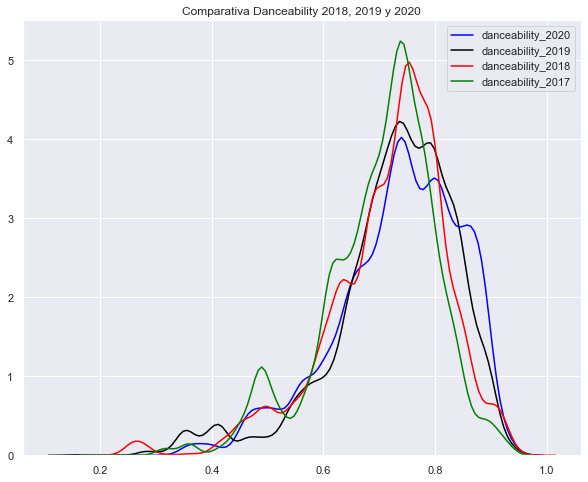

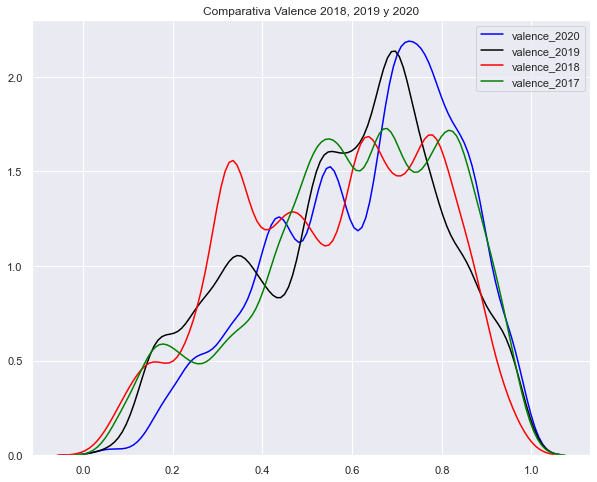

In [55]:
# Ploteamos en gráfico para ver la cantidad de canciones con los valores de determinadas features

data_glo_2020 = data_glo[data_glo['year'] == 2020]
data_glo_2019 = data_glo[data_glo['year'] == 2019]
data_glo_2018 = data_glo[data_glo['year'] == 2018]
data_glo_2017 = data_glo[data_glo['year'] == 2017]

feature_list = ['length','popularity', 'acousticness', 'danceability','energy', 'instrumentalness', 'liveness',
                'loudness', 'speechiness', 'valence', 'tempo']

features_2020 = data_glo_2020[feature_list]
features_2019 = data_glo_2019[feature_list]
features_2018 = data_glo_2018[feature_list]
features_2017 = data_glo_2017[feature_list]


fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Comparativa Danceability 2018, 2019 y 2020')
sns.kdeplot(features_2020['danceability'], ax=ax1, color = 'blue', Label='danceability_2020')
sns.kdeplot(features_2019['danceability'], ax=ax1, color = 'black', Label='danceability_2019')
sns.kdeplot(features_2018['danceability'], ax=ax1, color = 'red', Label='danceability_2018')
sns.kdeplot(features_2017['danceability'], ax=ax1, color = 'green', Label='danceability_2017')

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Comparativa Valence 2018, 2019 y 2020')
sns.kdeplot(features_2020['valence'], ax=ax1, color = 'blue', Label='valence_2020')
sns.kdeplot(features_2019['valence'], ax=ax1, color = 'black', Label='valence_2019')
sns.kdeplot(features_2018['valence'], ax=ax1, color = 'red', Label='valence_2018')
sns.kdeplot(features_2017['valence'], ax=ax1, color = 'green', Label='valence_2017')

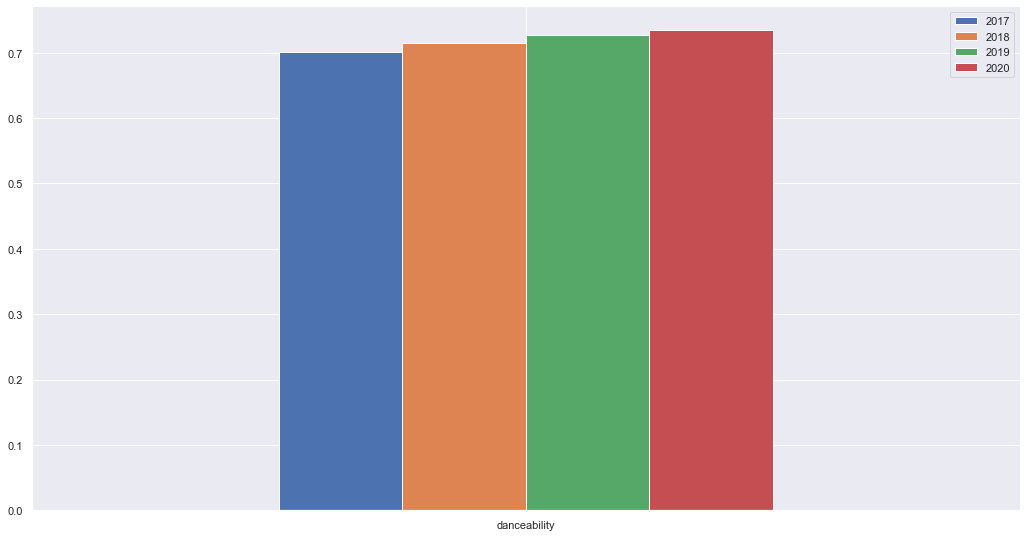

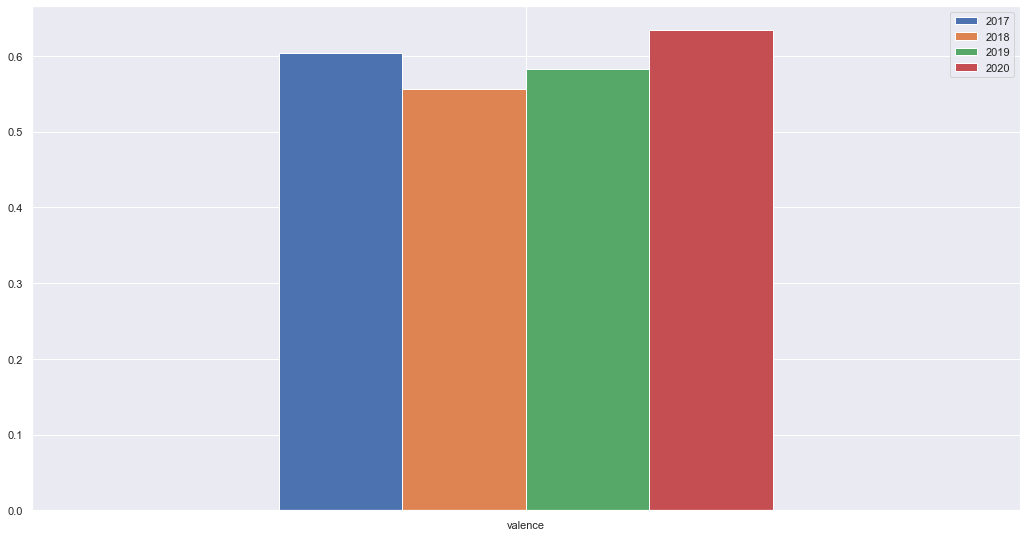

In [56]:
# Hacemos lo mismo pero viendo las medias (ojo! sin ponderar, eso lo hacemos en el análisis)

data_mean_dance_2020 = features_2020['danceability'].mean()
data_mean_dance_2019 = features_2019['danceability'].mean()
data_mean_dance_2018 = features_2018['danceability'].mean()
data_mean_dance_2017 = features_2017['danceability'].mean()
index_dance = ['danceability']

data_mean_valen_2020 = features_2020['valence'].mean()
data_mean_valen_2019 = features_2019['valence'].mean()
data_mean_valen_2018 = features_2018['valence'].mean()
data_mean_valen_2017 = features_2017['valence'].mean()
index_valen = ['valence']

df_dance = pd.DataFrame({'2017': data_mean_dance_2017,'2018': data_mean_dance_2018,'2019': data_mean_dance_2019, '2020': data_mean_dance_2020}, index=index_dance)
ax = df_dance.plot.bar(rot=0)

df_valen = pd.DataFrame({'2017': data_mean_valen_2017, '2018': data_mean_valen_2018,'2019': data_mean_valen_2019, '2020': data_mean_valen_2020}, index=index_valen)
ax = df_valen.plot.bar(rot=0)

# Ojo, habria que calcular la media ponderada respecto a streams totales!!!

(48059, 36)
(1429, 36)


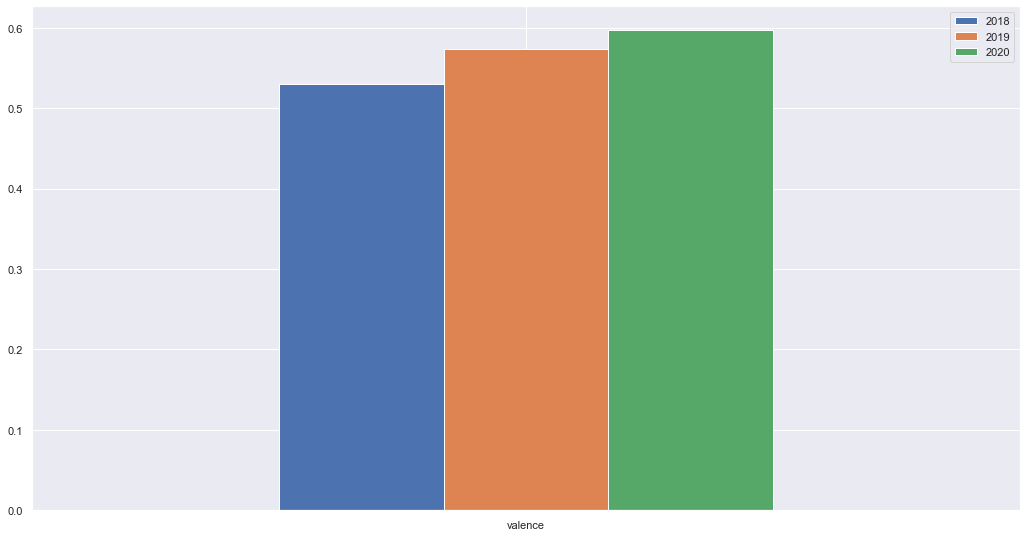

In [57]:
# Lo mismo que anterior pero quitando duplicados por artista, es decir para que no se repitan muchos unos mismos artistas por canciones
data_glo2 = data_glo.drop_duplicates(subset=['Track Name'])
print(data_glo.shape)
print(data_glo2.shape)

data_glo2_2020 = data_glo2[data_glo2['year'] == 2020]
data_glo2_2019 = data_glo2[data_glo2['year'] == 2019]
data_glo2_2018 = data_glo2[data_glo2['year'] == 2018]
data_glo2_2017 = data_glo2[data_glo2['year'] == 2017]

feature_list2 = ['length','popularity', 'acousticness', 'danceability','energy', 'instrumentalness', 'liveness',
                'loudness', 'speechiness', 'valence', 'tempo']

features2_2020 = data_glo2_2020[feature_list2]
features2_2019 = data_glo2_2019[feature_list2]
features2_2018 = data_glo2_2018[feature_list2]
features2_2017 = data_glo2_2018[feature_list2]

data_mean2_2020 = features2_2020['valence'].mean()
data_mean2_2019 = features2_2019['valence'].mean()
data_mean2_2018 = features2_2018['valence'].mean()
data_mean2_2017 = features2_2018['valence'].mean()
index = ['valence']

df = pd.DataFrame({'2018': data_mean2_2018, '2018': data_mean2_2018, '2019': data_mean2_2019, '2020': data_mean2_2020}, index=index)
ax = df.plot.bar(rot=0)


In [58]:
'''# Mi prueba que al final sale bien!!!!! Peeeeero, cómo hago para que en vez de uno, pase una lista de canciones?? SIN TOCAR
API_LIMIT = 50

number_of_tracks = 2000
artist = ['Earth, Wind & Fire']

search_runs = int(number_of_tracks / API_LIMIT)

search_list = []
for i in range(search_runs):
    print("Call #{} for tracks".format(i+1))
    search_results = sp.search(q = 'artist:"{}"'.format(artist), type="artist",  limit=API_LIMIT, offset=API_LIMIT*i)

    search_list += [[t["id"], t["name"], t["genres"], t['followers']['total'], t['popularity']] for t in search_results['artists']['items']]

df_search = pd.DataFrame(search_list, columns=["id", "name", "genres", 'followers', 'popularity'])
df_search.head()
'''

''' OTRO SCRIPT
def _get_features_df(sp, track_ids):
    """
    This is an helper method to get track's features with pagination from track ids.
    It returns a Pandas dataframe
    """

    feature_list = []
    i = 0
    while track_ids:
        print("Call #{} for audio features".format(i + 1))
        features_results = sp.audio_features(track_ids[:API_LIMIT])

        feature_list += features_results
        
        track_ids = track_ids[API_LIMIT:]
        i += 1
    return feature_list

_get_features_df(sp, '7k4t7uLgtOxPwTpFmtJNTY')
'''

''' OTRO SCRIPT #PAra obtener los artists id
def _get_artists_df(sp, artist_ids):
    """
    This is an helper method to get artist's information with pagination from artist ids.
    It returns a Pandas dataframe
    """

    artist_list = []
    i = 0

    while artist_ids:
        print("Call #{} for artists".format(i + 1))
        artists_results = sp.artists(artist_ids[:API_LIMIT])

        artist_list += [[t["id"], t["genres"], t["popularity"]] for t in artists_results["artists"]]

        artist_ids = artist_ids[API_LIMIT:]
        i += 1

    df_artists = pd.DataFrame(artist_list, columns=["artist_id", "artist_genres", "artist_popularity"])

    df_artists["artist_popularity_norm"] = df_artists["artist_popularity"] / 100.

    return df_artists

# https://github.com/jvichare/rshiny-music-visualization/blob/master/Spotify%20Song%20Query.ipynb

'''

'''# Este script coge los artistas con un determinado genre, EL ORGINAL
API_LIMIT = 50

number_of_tracks = 2000
genre = 'jazz'

search_runs = int(number_of_tracks / API_LIMIT)

search_list = []
for i in range(search_runs):
    print("Call #{} for tracks".format(i+1))
    search_results = sp.search('genre:"{}"'.format(genre), type="track",  limit=API_LIMIT, offset=API_LIMIT*i)

    search_list += [[t["id"], t["name"], t["artists"][0]["id"], t["artists"][0]["name"],
                            t["album"]["name"], t["popularity"]]
                           for t in search_results['tracks']['items']]

df_search = pd.DataFrame(search_list, 
                         columns=["id", "song_name", "artist_id", "artist_name", "album_name", "popularity"])
df_search["popularity_norm"] = df_search["popularity"] / 100.
df_search.head()
'''

'# Este script coge los artistas con un determinado genre, EL ORGINAL\nAPI_LIMIT = 50\n\nnumber_of_tracks = 2000\ngenre = \'jazz\'\n\nsearch_runs = int(number_of_tracks / API_LIMIT)\n\nsearch_list = []\nfor i in range(search_runs):\n    print("Call #{} for tracks".format(i+1))\n    search_results = sp.search(\'genre:"{}"\'.format(genre), type="track",  limit=API_LIMIT, offset=API_LIMIT*i)\n\n    search_list += [[t["id"], t["name"], t["artists"][0]["id"], t["artists"][0]["name"],\n                            t["album"]["name"], t["popularity"]]\n                           for t in search_results[\'tracks\'][\'items\']]\n\ndf_search = pd.DataFrame(search_list, \n                         columns=["id", "song_name", "artist_id", "artist_name", "album_name", "popularity"])\ndf_search["popularity_norm"] = df_search["popularity"] / 100.\ndf_search.head()\n'